# Machine Learning 382 Project: BrightPath Academy #


## Problem Statement ##

**BrightPath Academy** struggles to identify at-risk students early and tailor interventions due to delayed insights and data overload. This project aims to develop a machine learning model the Student_performance_data to classify students’ GradeClass (A–F) using demographic, academic, and extracurricular data, enabling timely interventions and personalised support strategies.

## Hypothesis Generation ##

- If a student has more than 15 absences, then they are more likely to have a GradeClass of D or F.
- Weekly study time positively impacts GPA.
- Frequent absences negatively affect academic performance.
- Students with higher parental involvement (ParentalSupport) tend to achieve better grades.
- Participation in extracurricular activities positively impacts GPA.


## Getting the system ready and loading the data ##


Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Load the Data

In [2]:
df = pd.read_csv('Student_performance_data .csv')

## Understanding the Data ##

In [3]:
print(df.info())
print(df.shape)

print(df.describe())

print(df.isnull().sum())

print(df['GradeClass'].value_counts())
print(df['GradeClass'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None
(2392, 15)
        

Inspect first 5 Rows

In [4]:
display(df.head())

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Descriptive Statistics

In [5]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


Feature Selection

In [6]:
all_vars = df.columns
output_var = 'GradeClass'
input_vars = all_vars.drop(output_var).to_list()

df_inputs = df[input_vars]
df_outputs = df[output_var]
print(f'There are now {len(df_inputs.columns)} input variables.')

display(df_inputs.head())

There are now 14 input variables.


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


Check for Unique values

In [7]:
df[input_vars].nunique().sort_values(ascending=False).head(10)

StudentID            2392
StudyTimeWeekly      2392
GPA                  2371
Absences               30
ParentalEducation       5
ParentalSupport         5
Age                     4
Ethnicity               4
Gender                  2
Tutoring                2
dtype: int64

Categorizing the Data

In [8]:
# Categorical columns
int_col = [col for col in df.columns if df[col].dtype == 'int64']
print('Integer columns :',int_col)
# Numerical columns
float_col = [col for col in df.columns if df[col].dtype == 'float64']
print('Float columns :',float_col)

Integer columns : ['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
Float columns : ['StudyTimeWeekly', 'GPA', 'GradeClass']


Check for Duplicates

In [9]:
duplicates = df[df.duplicated()]

print(duplicates)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


Check for missing Values

In [10]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## Correlation Graph to Clean Unneccessary Data ##

C:\Users\calvi\AppData\Local\Temp\ipykernel_1388\865229569.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_gradeclass.values, y=correlation_with_gradeclass.index, palette='coolwarm')


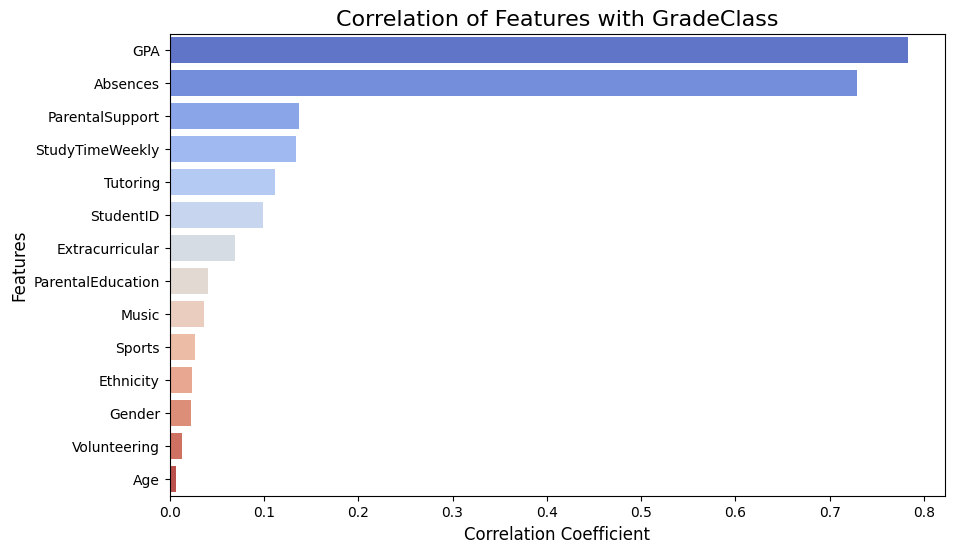

In [11]:
# Calculate correlation of all features with 'GradeClass'
correlation_with_gradeclass = df.corr()['GradeClass'].drop('GradeClass')

# Sort correlations by absolute value for better visualization
correlation_with_gradeclass = correlation_with_gradeclass.abs().sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_gradeclass.values, y=correlation_with_gradeclass.index, palette='coolwarm')
plt.title('Correlation of Features with GradeClass', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [12]:
def CorrPlot(df, dropDuplicates = True, figsize = (8, 6)):
    # df = df.corr()
    df = np.abs(df.corr())
    # Exclude duplicate correlations by masking upper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
    # Set background color / chart style
    sns.set_style(style = 'white')
    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=figsize)
    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                    annot=True,
                    square=True,
                    linewidth=.5, cbar_kws={"shrink": .75}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                annot=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

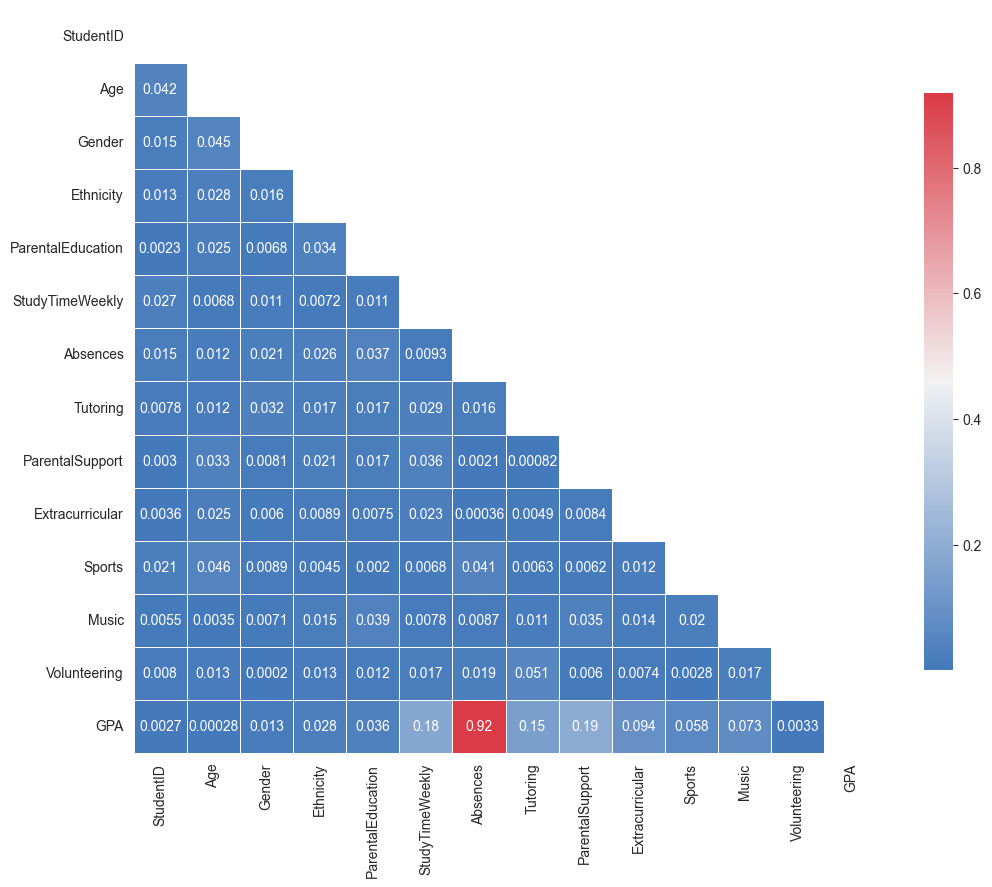

In [13]:
CorrPlot(df_inputs, figsize = (12, 10))

Removing Irrelevant Data

In [14]:
df_cleaned = df.drop(columns = ['Age', 'Volunteering', 'Gender', 'Ethnicity', 'Sports', 'Music', 'ParentalEducation',
                                'Extracurricular', 'StudentID', 'GradeClass'])

display(df_cleaned.head())

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GPA
0,19.833723,7,1,2,2.929196
1,15.408756,0,0,1,3.042915
2,4.210570,26,0,2,0.112602
3,10.028829,14,0,3,2.054218
4,4.672495,17,1,3,1.288061


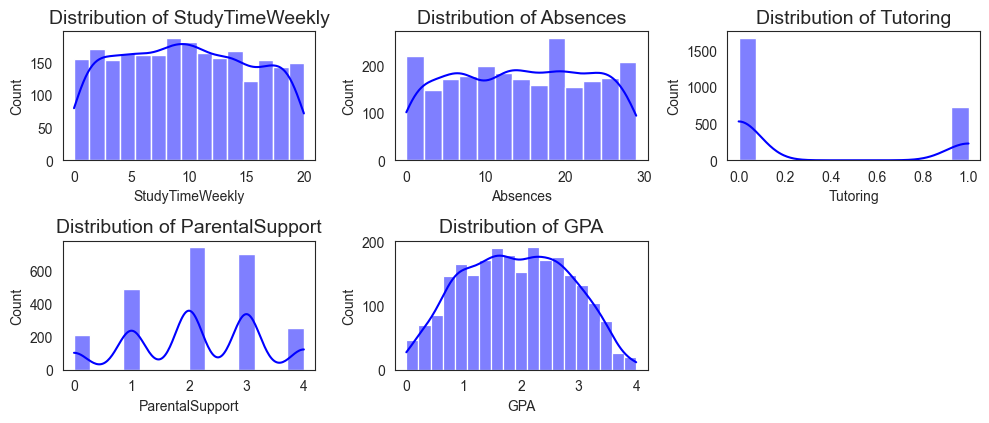

In [15]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(df_cleaned.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_cleaned[col], kde=True, color='blue', alpha=0.5)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.tight_layout()
plt.show()

## Univariate Analysis ##

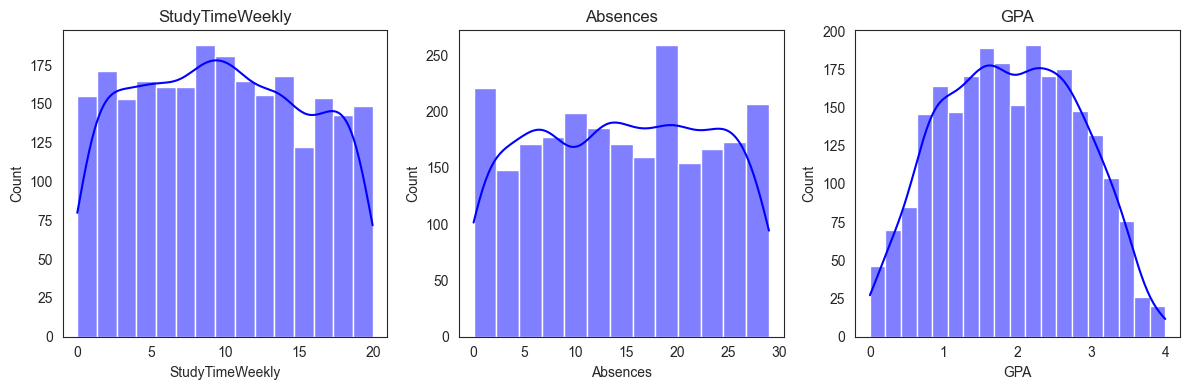

In [16]:
selected_features = ['StudyTimeWeekly', 'Absences', 'GPA']  

plt.figure(figsize=(12, 4))
for i, col in enumerate(selected_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, color='blue', alpha=0.5)
    plt.title(col)
plt.tight_layout()
plt.show()

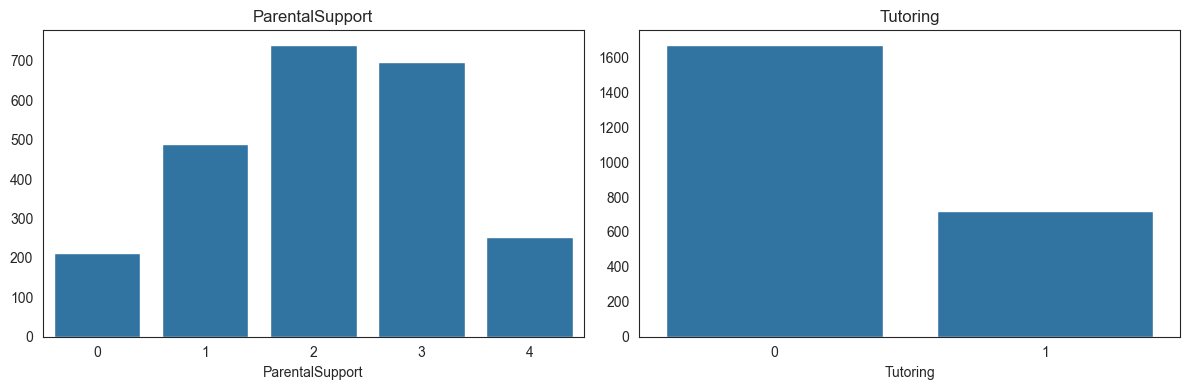

In [17]:
chosen_features = ['ParentalSupport', 'Tutoring']  

plt.figure(figsize=(12, 4))
for i, col in enumerate(chosen_features):
    plt.subplot(1, 2, i+1)
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(col)
plt.tight_layout()
plt.show()

## Bivariate Analysis ##

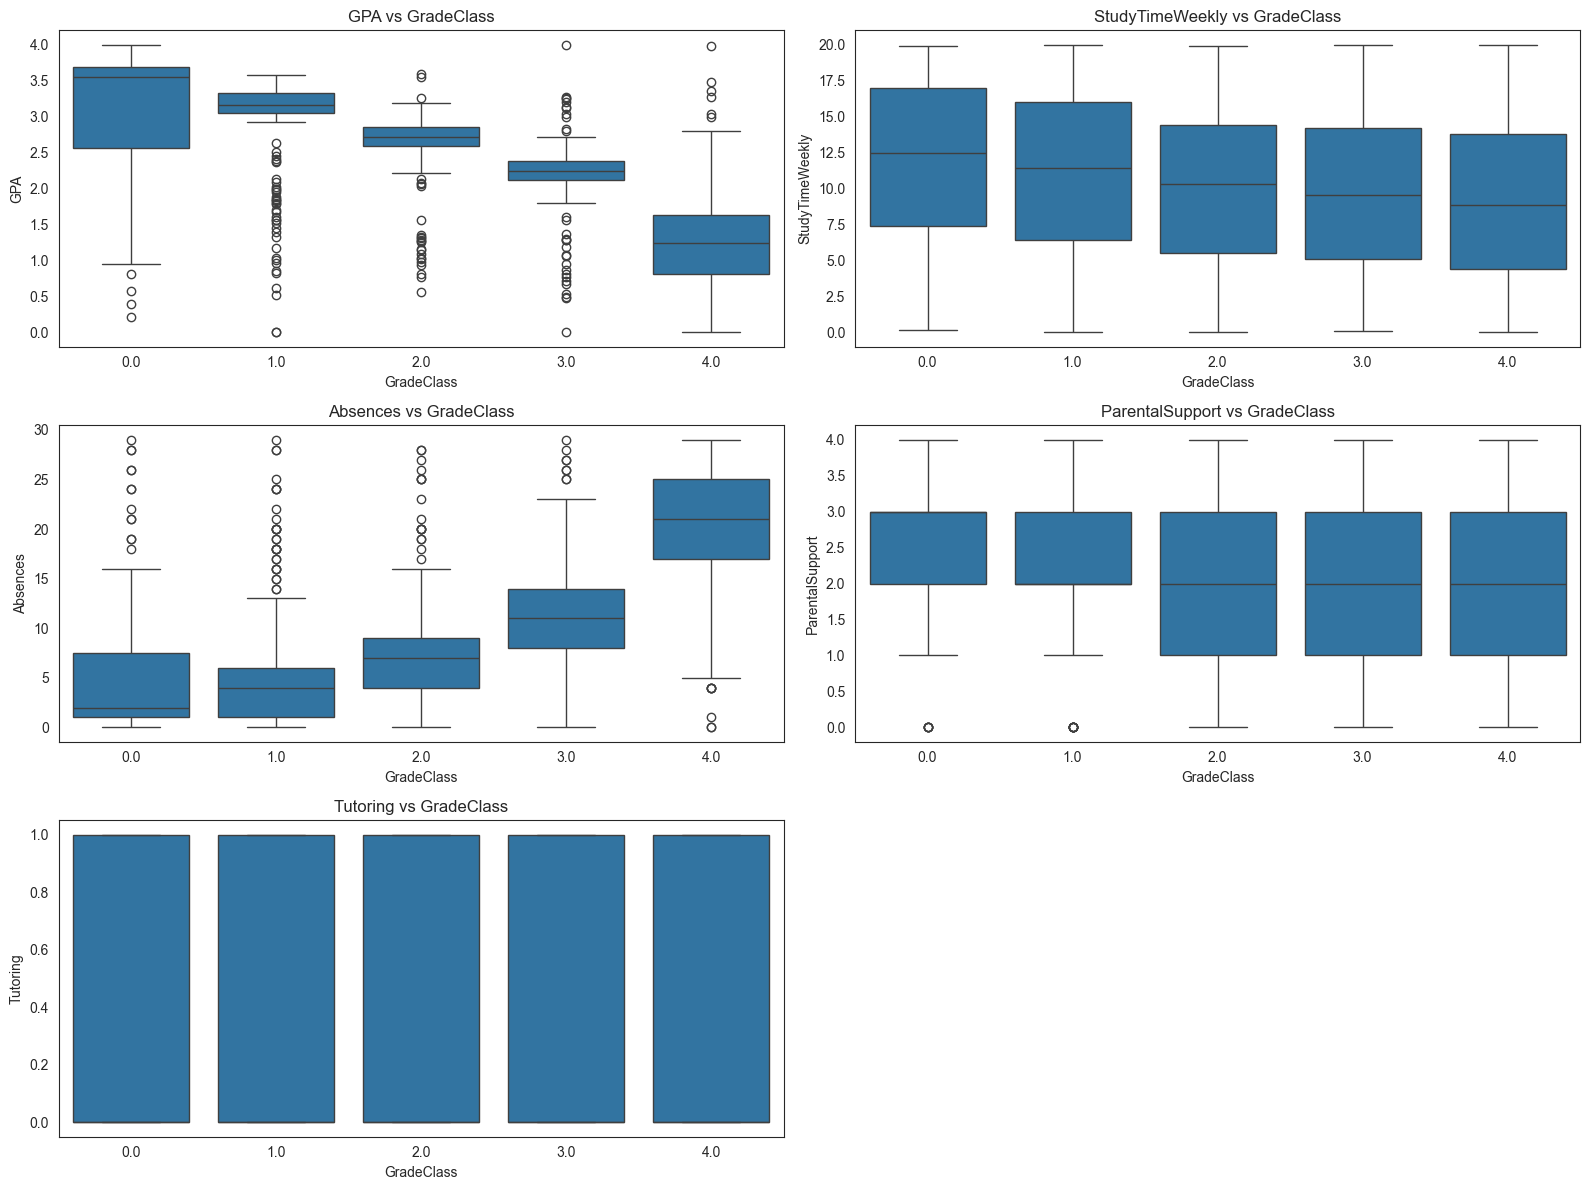

C:\Users\calvi\AppData\Local\Temp\ipykernel_1388\2030101869.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='GradeClass', y=col, data=df, inner='quartile', palette='muted')
C:\Users\calvi\AppData\Local\Temp\ipykernel_1388\2030101869.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='GradeClass', y=col, data=df, inner='quartile', palette='muted')
C:\Users\calvi\AppData\Local\Temp\ipykernel_1388\2030101869.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='GradeClass', y=col, data=df, inner='quartile', palette='muted'

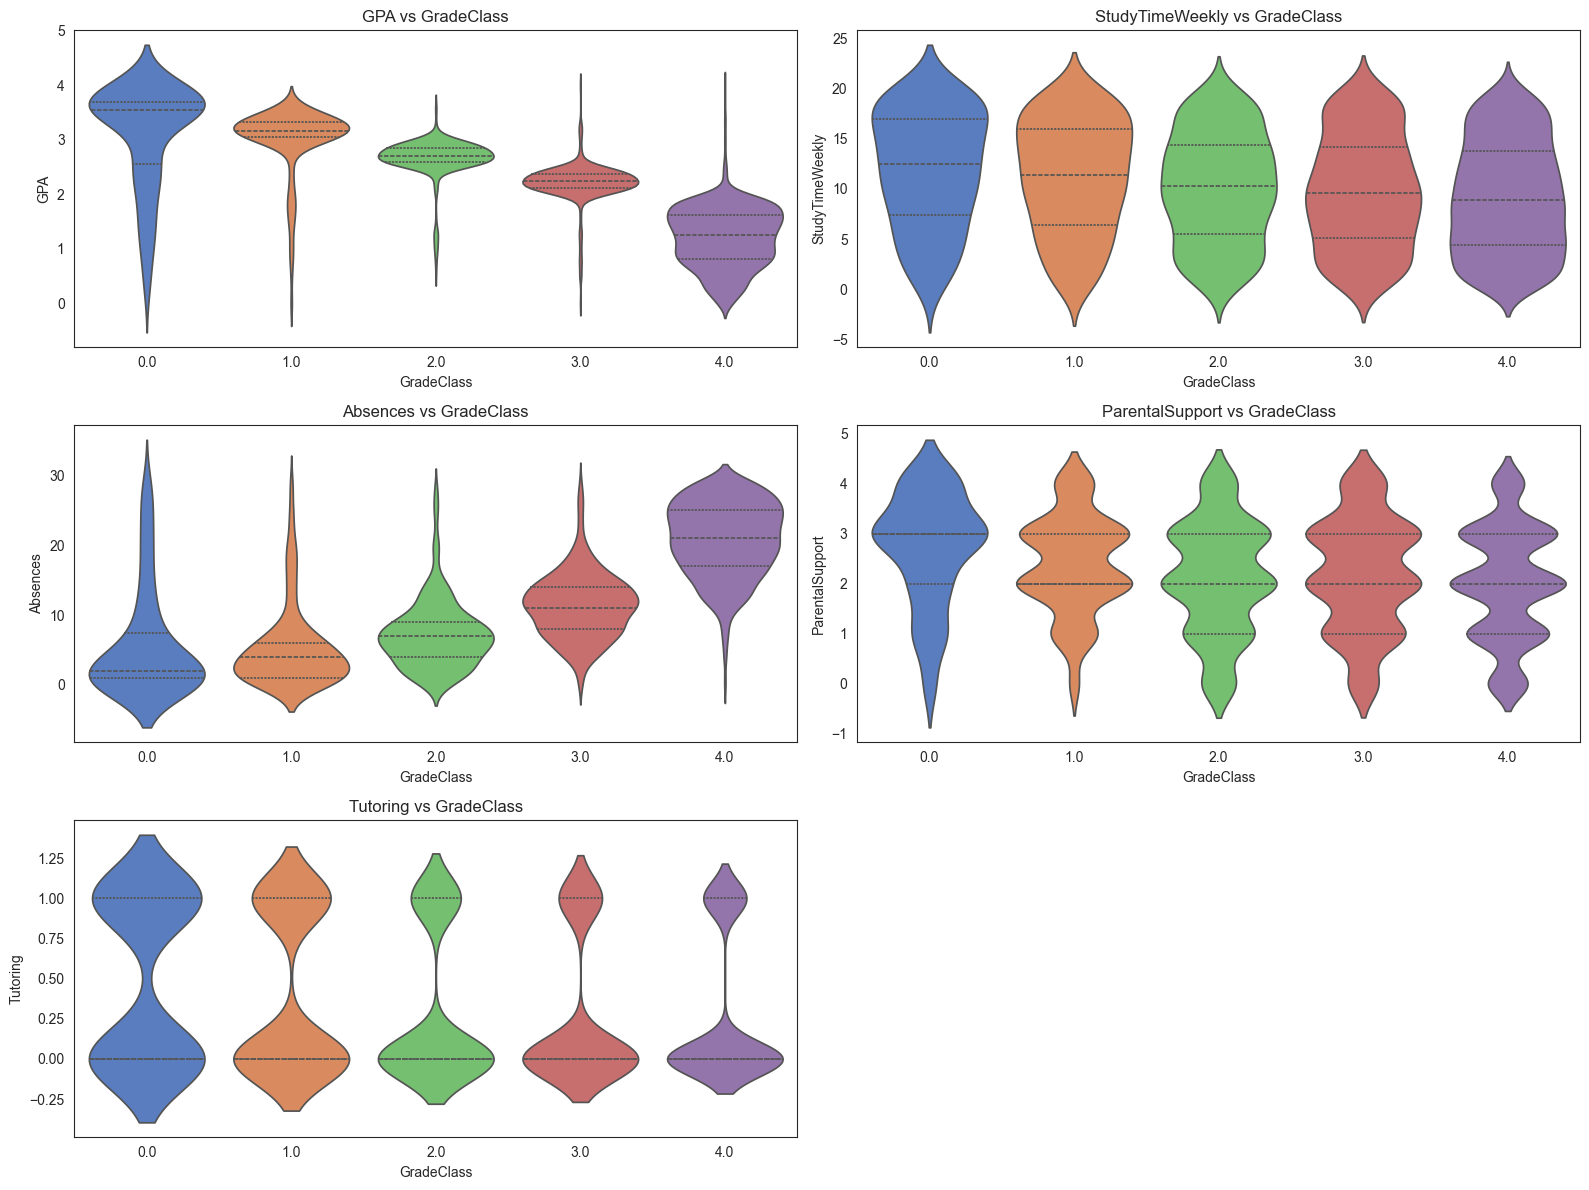

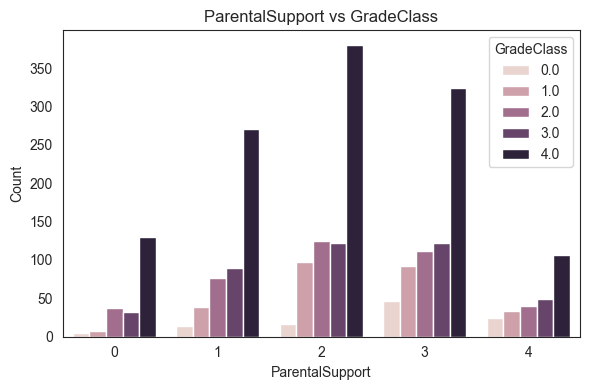

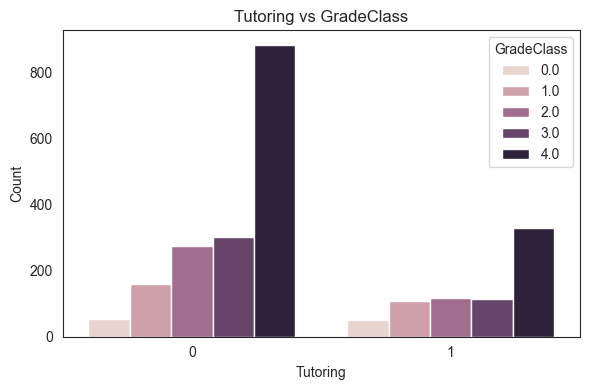

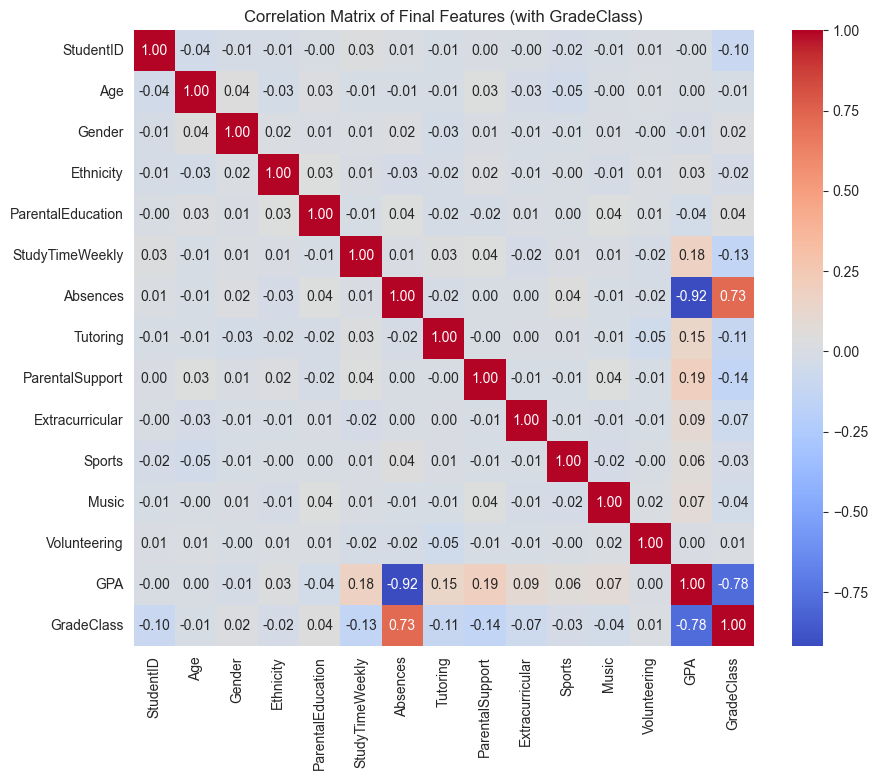

In [18]:
numerical_features = ['GPA', 'StudyTimeWeekly', 'Absences', 'ParentalSupport', 'Tutoring']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='GradeClass', y=col, data=df)
    plt.title(f'{col} vs GradeClass')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.violinplot(x='GradeClass', y=col, data=df, inner='quartile', palette='muted')
    plt.title(f'{col} vs GradeClass')
plt.tight_layout()
plt.show()

categorical_features = ['ParentalSupport', 'Tutoring']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='GradeClass', data=df)
    plt.title(f'{feature} vs GradeClass')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='GradeClass')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Final Features (with GradeClass)')
plt.show()


## Missing Values and Outlier Treatment ##

1. Check again for missing values

In [19]:
df_cleaned.isnull().sum()

StudyTimeWeekly    0
Absences           0
Tutoring           0
ParentalSupport    0
GPA                0
dtype: int64

2. Boxplot for cleaned features

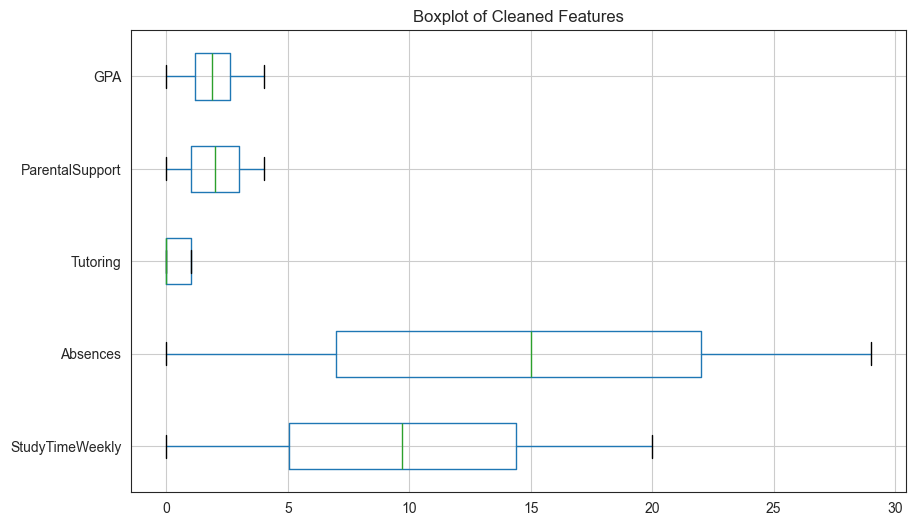

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df_cleaned.boxplot(vert = False, ax = ax)
_ = ax.set_title(f'Boxplot of Cleaned Features')

Checking Skewness

In [21]:
for col in df_cleaned.columns:
    print(f'{col} = {df_cleaned[col].skew()}')

StudyTimeWeekly = 0.05006807255835409
Absences = -0.026017090405395748
Tutoring = 0.8660445294904519
ParentalSupport = -0.16685872350058553
GPA = 0.014525601346976225


Scaling the data

In [22]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_cleaned),
    index=df_cleaned.index,
    columns=df_cleaned.columns
)

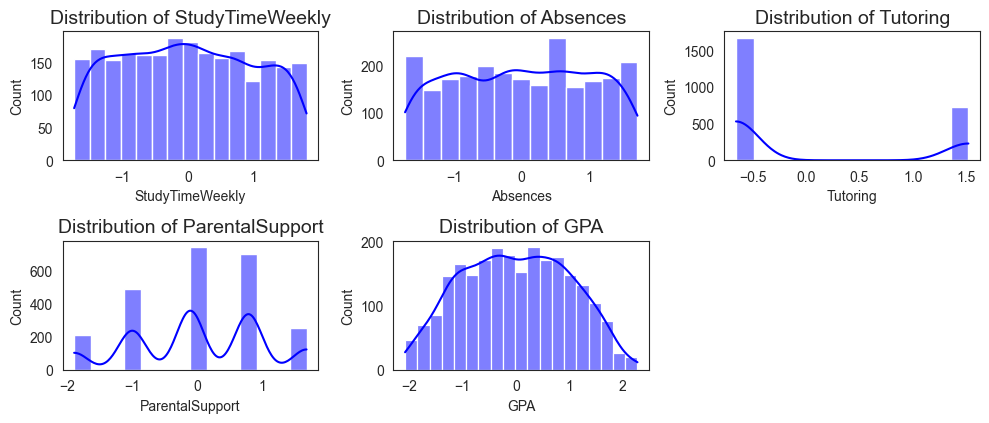

In [23]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(df_scaled.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_scaled[col], kde=True, color='blue', alpha=0.5)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.tight_layout()
plt.show()

Remove outliers 


In [24]:
iso = IsolationForest(contamination=0.1, random_state=42)
outliers = iso.fit_predict(df_scaled)

# 3. Select only the inliers (outliers == 1) — index is preserved here
df_removed_outliers = df_scaled.loc[outliers == 1].copy()

# 4. Reattach your target
df_removed_outliers['GradeClass'] = df_outputs.loc[df_removed_outliers.index]

# Quick check
display(df_removed_outliers.head())
print(df_removed_outliers.shape)

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GPA,GradeClass
0,1.780336,-0.890822,1.522371,-0.108744,1.118086,2.0
1,0.997376,-1.717694,-0.656870,-0.999551,1.242374,1.0
2,-0.984045,1.353542,-0.656870,-0.108744,-1.960277,4.0
3,0.045445,-0.063951,-0.656870,0.782063,0.161790,3.0
4,-0.902311,0.290422,1.522371,0.782063,-0.675573,4.0


(2152, 6)


## Evaluation Metrics for Classification Problem ##

In [25]:
X = df_removed_outliers.drop(columns=[output_var])
y = df_removed_outliers[output_var]

display(X, y)

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GPA
0,1.780336,-0.890822,1.522371,-0.108744,1.118086
1,0.997376,-1.717694,-0.656870,-0.999551,1.242374
2,-0.984045,1.353542,-0.656870,-0.108744,-1.960277
3,0.045445,-0.063951,-0.656870,0.782063,0.161790
4,-0.902311,0.290422,1.522371,0.782063,-0.675573
...,...,...,...,...,...
2385,-1.473312,0.644796,-0.656870,0.782063,-0.558006
2386,0.715202,-0.063951,-0.656870,-0.108744,0.102624
2389,-0.524895,0.644796,-0.656870,-0.108744,-0.834845
2390,0.467950,0.290422,-0.656870,-0.108744,-0.112452


0       2.0
1       1.0
2       4.0
3       3.0
4       4.0
       ... 
2385    1.0
2386    4.0
2389    2.0
2390    1.0
2391    1.0
Name: GradeClass, Length: 2152, dtype: float64

Splitting to Training and test data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the Model

In [27]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

#Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Calculating metrics

In [28]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {np.round(100*train_accuracy, 1)}%')

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {np.round(100*test_accuracy, 1)}%')

Train Accuracy: 100.0%
Test Accuracy: 89.8%


Classification report

In [29]:
report_dict = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report_dict).transpose()

styled_report = report_df.style.background_gradient(cmap='YlGnBu').format("{:.2f}")
display(styled_report)

,precision,recall,f1-score,support
0.0,0.90,0.53,0.67,17.00
1.0,0.93,0.78,0.85,54.00
2.0,0.96,0.88,0.92,75.00
3.0,0.87,0.88,0.87,82.00
4.0,0.88,0.98,0.93,203.00
accuracy,0.90,0.90,0.90,0.90
macro avg,0.91,0.81,0.85,431.00
weighted avg,0.90,0.90,0.89,431.00


Confusion matrix

[[ 44   0   0   0   0]
 [  0 185   0   0   0]
 [  0   0 291   0   0]
 [  0   0   0 322   0]
 [  0   0   0   0 879]]
Training Prediction Accuracy: 100.0%


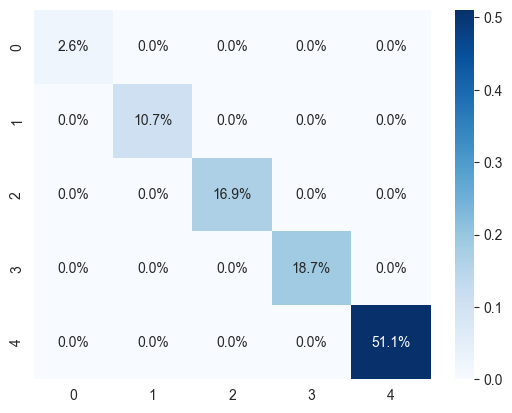

In [30]:
cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)
cm_train_prob = cm_train/np.sum(cm_train)
_ = sns.heatmap(cm_train_prob, annot=True,cmap='Blues', fmt='.1%')
print(f'Training Prediction Accuracy: {np.round(100 * train_accuracy, 1)}%')

## Feature Engineering ##

In [31]:
#Creating the new features
#Using the cleaned data, because then I will scale them with the new features
df_new_features = df_cleaned.copy()

#How can parental support and tutoring increase the performance of students?
df_new_features['SupportScore'] = df_new_features['ParentalSupport'] + df_new_features['Tutoring']

#Does parental support incre the GPA of students?
df_new_features['SupportedGPA'] = df_new_features['GPA'] * df_new_features['ParentalSupport']

#Does tutoring and study time affect the performance of students?
df_new_features['ExtraWork'] = df_new_features['StudyTimeWeekly'] * df_new_features['Tutoring']

In [32]:
display(df_new_features.head())

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GPA,SupportScore,SupportedGPA,ExtraWork
0,19.833723,7,1,2,2.929196,3,5.858391,19.833723
1,15.408756,0,0,1,3.042915,1,3.042915,0.000000
2,4.210570,26,0,2,0.112602,2,0.225205,0.000000
3,10.028829,14,0,3,2.054218,3,6.162654,0.000000
4,4.672495,17,1,3,1.288061,4,3.864184,4.672495


Boxplot

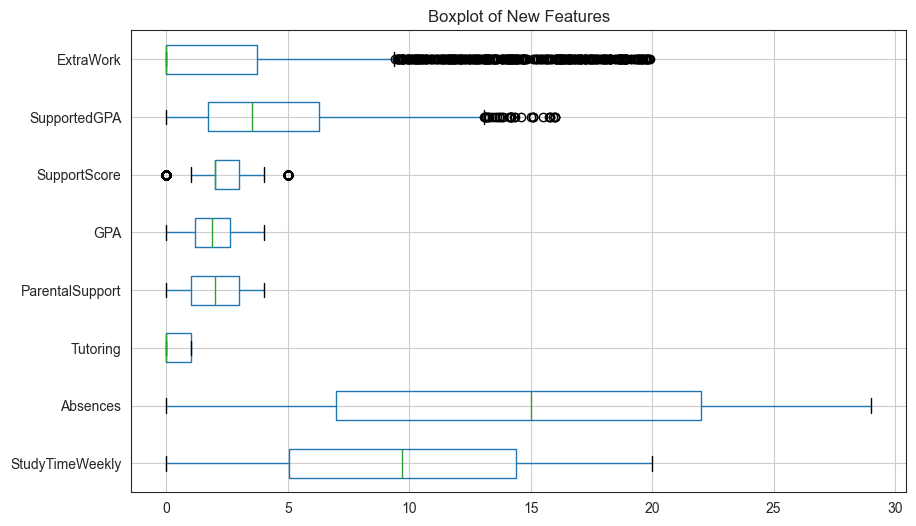

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df_new_features.boxplot(vert = False, ax = ax)
_ = ax.set_title(f'Boxplot of New Features')

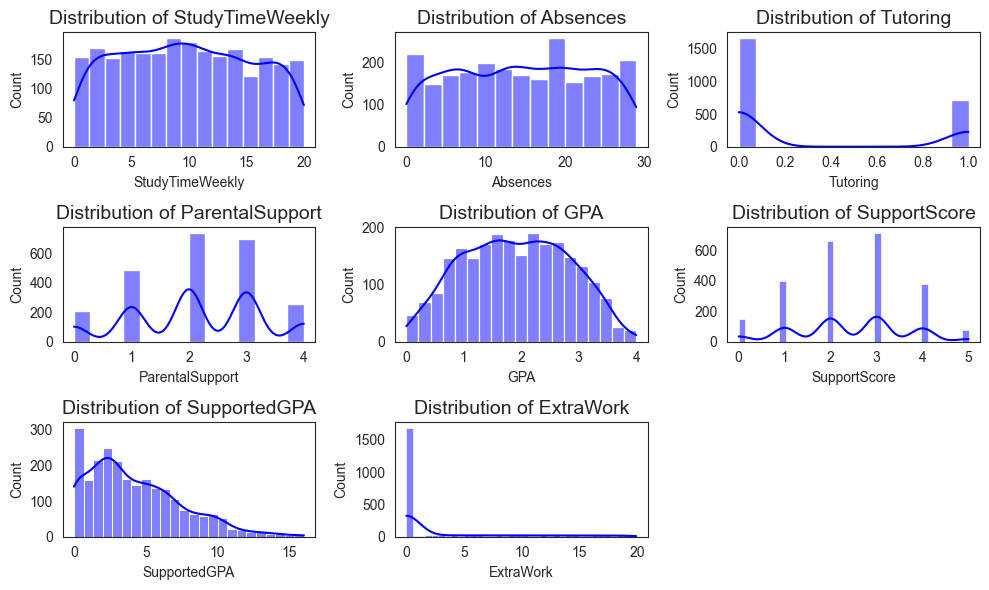

In [34]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(df_new_features.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_new_features[col], kde=True, color='blue', alpha=0.5)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.tight_layout()
plt.show()

Check Skewness

In [35]:
for col in df_new_features.columns:
    print(f'{col} = {df_new_features[col].skew()}')

StudyTimeWeekly = 0.05006807255835409
Absences = -0.026017090405395748
Tutoring = 0.8660445294904519
ParentalSupport = -0.16685872350058553
GPA = 0.014525601346976225
SupportScore = -0.09288602235642462
SupportedGPA = 0.8397580146364794
ExtraWork = 1.6825424874285464


Transforming the new features

In [36]:
df_feat = df_new_features.copy()

In [37]:
features_to_transform = ['ExtraWork', 'SupportedGPA']

In [38]:
pt = PowerTransformer(method='yeo-johnson')  

df_feat[features_to_transform] = pt.fit_transform(df_feat[features_to_transform])

In [39]:
for col in features_to_transform:
    #print(col, round(df_feat[col].skew(), 2))
    print(f'{col} = {df_feat[col].skew()}')

ExtraWork = 0.9328868253534139
SupportedGPA = -0.05737947998188417


Transformed data

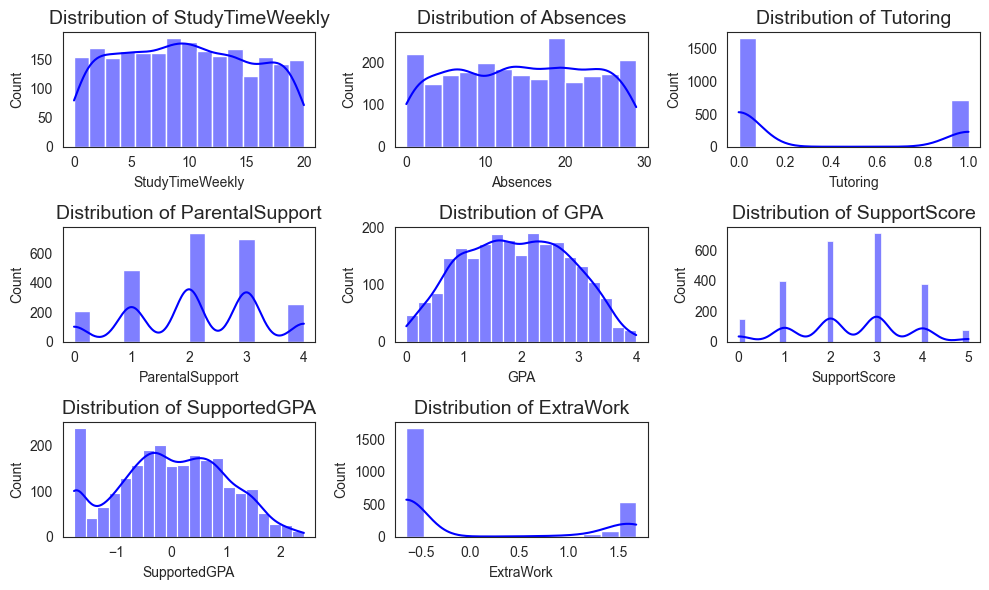

In [40]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(df_feat.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_feat[col], kde=True, color='blue', alpha=0.5)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.tight_layout()
plt.show()

Scale data

In [41]:
scaler = StandardScaler()
df_new_scaled = pd.DataFrame(
    scaler.fit_transform(df_feat),
    index=df_feat.index,
    columns=df_feat.columns
)

Histoplot of scaled data

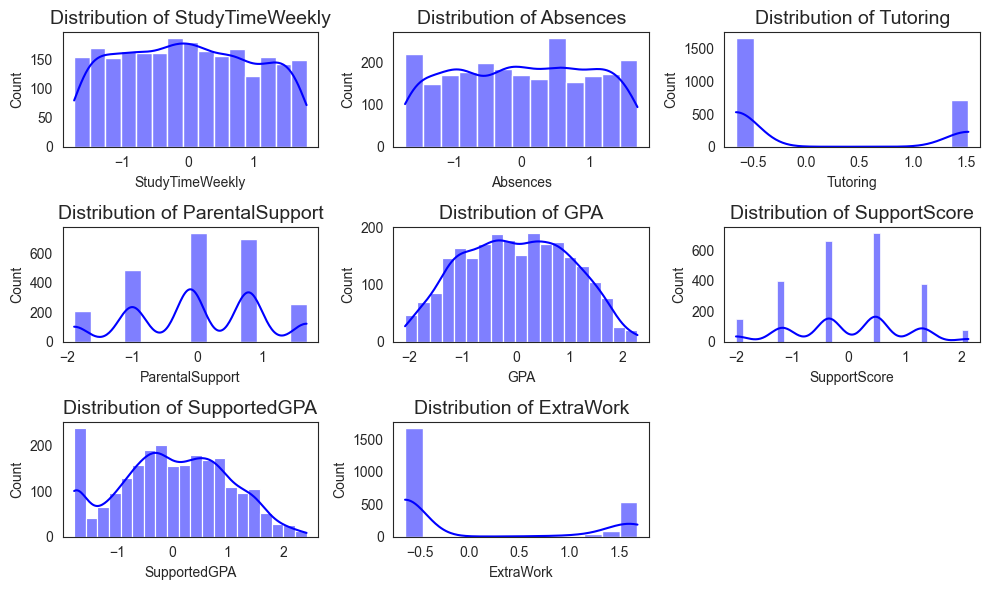

In [42]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(df_new_scaled.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_new_scaled[col], kde=True, color='blue', alpha=0.5)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.tight_layout()
plt.show()

Remove outliers

In [43]:
iso = IsolationForest(contamination=0.1, random_state=42)
outliers_new = iso.fit_predict(df_new_scaled)

# 3. Select only the inliers (outliers == 1) — index is preserved here
df_removed_new = df_new_scaled.loc[outliers_new == 1].copy()

# 4. Reattach your target
df_removed_new['GradeClass'] = df_outputs.loc[df_removed_new.index]

# Quick check
display(df_removed_new.head())
print(df_removed_new.shape)

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GPA,SupportScore,SupportedGPA,ExtraWork,GradeClass
0,1.780336,-0.890822,1.522371,-0.108744,1.118086,0.475510,0.652855,1.688259,2.0
1,0.997376,-1.717694,-0.656870,-0.999551,1.242374,-1.174119,-0.164608,-0.646326,1.0
2,-0.984045,1.353542,-0.656870,-0.108744,-1.960277,-0.349305,-1.576979,-0.646326,4.0
3,0.045445,-0.063951,-0.656870,0.782063,0.161790,0.475510,0.726278,-0.646326,3.0
4,-0.902311,0.290422,1.522371,0.782063,-0.675573,1.300324,0.106005,1.458818,4.0


(2152, 9)


## Baseline Algorithms ##

In [44]:
df_removed_new = df.copy()
df_removed_new.columns = df_removed_new.columns.str.strip()

X = df_removed_new.drop(columns=['GradeClass'])
y = df_removed_new['GradeClass']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
model = RandomForestClassifier(random_state=90)
model.fit(X_train, y_train)

#Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [47]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
print("Test accuracy:", rf.score(X_test, y_test))

Test accuracy: 0.9102296450939458


# Deep Learning Model with MLPClassifier

In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42 # Set a random state for reproducibility

In [49]:
# 1: Generic SMOTE balancing
smote = SMOTE(random_state=RANDOM_STATE)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [50]:
# 2: Train & evaluate MLP on generic SMOTE data
mlp_gen = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=1e-4,
    learning_rate='adaptive',
    tol=1e-4,
    n_iter_no_change=10,
    early_stopping=True,
    validation_fraction=0.1,
    max_iter=200,
    random_state=RANDOM_STATE,
    verbose=True
)
mlp_gen.fit(X_res, y_res)

print("Train acc:", mlp_gen.score(X_res, y_res))
print("Test  acc:", mlp_gen.score(X_test, y_test))

y_pred_gen = mlp_gen.predict(X_test)
print(classification_report(y_test, y_pred_gen, digits=4, zero_division= 0))



Iteration 1, loss = 28.01984791
Validation score: 0.185950
Iteration 2, loss = 21.49395214
Validation score: 0.301653
Iteration 3, loss = 9.89199083
Validation score: 0.202479
Iteration 4, loss = 3.09342110
Validation score: 0.338843
Iteration 5, loss = 1.86634652
Validation score: 0.309917
Iteration 6, loss = 1.71375515
Validation score: 0.338843
Iteration 7, loss = 1.81409058
Validation score: 0.320248
Iteration 8, loss = 1.59453390
Validation score: 0.334711
Iteration 9, loss = 1.54466421
Validation score: 0.398760
Iteration 10, loss = 1.48196495
Validation score: 0.371901
Iteration 11, loss = 1.51447251
Validation score: 0.402893
Iteration 12, loss = 1.59406075
Validation score: 0.369835
Iteration 13, loss = 1.51968438
Validation score: 0.390496
Iteration 14, loss = 1.80112671
Validation score: 0.332645
Iteration 15, loss = 1.83831194
Validation score: 0.326446
Iteration 16, loss = 1.47802460
Validation score: 0.394628
Iteration 17, loss = 1.69118644
Validation score: 0.466942
Iter

In [51]:
# 3: Targeted SMOTE for class 0 (“A”)
smote_targ = SMOTE(sampling_strategy={0: 200}, random_state=RANDOM_STATE)
X_res2, y_res2 = smote_targ.fit_resample(X_train, y_train)

from collections import Counter
print("Before:", Counter(y_train))
print("After:", Counter(y_res2))


Before: Counter({4.0: 968, 3.0: 331, 2.0: 313, 1.0: 215, 0.0: 86})
After: Counter({4.0: 968, 3.0: 331, 2.0: 313, 1.0: 215, 0.0: 200})


In [52]:
# 4: Train & evaluate MLP on targeted SMOTE data
mlp_targ = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=1e-4,
    learning_rate='adaptive',
    tol=1e-4,
    n_iter_no_change=10,
    early_stopping=True,
    validation_fraction=0.1,
    max_iter=200,
    random_state=RANDOM_STATE,
    verbose=True
)
mlp_targ.fit(X_res2, y_res2)

# report accuracies
print("Train acc:", mlp_targ.score(X_res2, y_res2))
print("Test  acc:", mlp_targ.score(X_test, y_test), "\n")

# classification report
y_pred_targ = mlp_targ.predict(X_test)
print(classification_report(y_test, y_pred_targ, digits=4, zero_division= 0))


Iteration 1, loss = 32.34840896
Validation score: 0.137931
Iteration 2, loss = 27.70910510
Validation score: 0.502463
Iteration 3, loss = 18.91287011
Validation score: 0.502463
Iteration 4, loss = 17.10537778
Validation score: 0.142857
Iteration 5, loss = 12.67597564
Validation score: 0.502463
Iteration 6, loss = 9.06986963
Validation score: 0.147783
Iteration 7, loss = 7.40598480
Validation score: 0.182266
Iteration 8, loss = 3.80619257
Validation score: 0.256158
Iteration 9, loss = 2.07629045
Validation score: 0.162562
Iteration 10, loss = 1.69654669
Validation score: 0.443350
Iteration 11, loss = 1.45594492
Validation score: 0.522167
Iteration 12, loss = 1.53681704
Validation score: 0.403941
Iteration 13, loss = 1.45961834
Validation score: 0.527094
Iteration 14, loss = 1.48665871
Validation score: 0.556650
Iteration 15, loss = 1.36792333
Validation score: 0.541872
Iteration 16, loss = 1.33212325
Validation score: 0.305419
Iteration 17, loss = 1.31088341
Validation score: 0.556650
I

In [53]:
# 5: Save preprocessing + model for deployment
from sklearn.pipeline import Pipeline
import joblib 

pipeline = Pipeline([
    ('scaler', scaler),
    ('mlp',    mlp_targ)
])

joblib.dump(pipeline, 'grade_predictor_pipeline.pkl')
print("Saved pipeline as grade_predictor_pipeline.pkl")

Saved pipeline as grade_predictor_pipeline.pkl


In [54]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier

#importing these to try hyperparameter grid 

In [55]:
# 6: pipeline & define hyperparameter grid
pipeline = ImbPipeline([
    ("smote", SMOTE(sampling_strategy={0:200}, random_state=RANDOM_STATE)),
    ("mlp", MLPClassifier(
        activation='relu',
        solver='adam',
        early_stopping=True,
        validation_fraction=0.1,
        tol=1e-4,
        n_iter_no_change=10,
        max_iter=200,
        random_state=RANDOM_STATE,
        verbose=False
    ))
])

param_dist = {
    "smote__sampling_strategy": [{0:100}, {0:200}, {0:243}],
    "mlp__hidden_layer_sizes": [(64,32), (128,64), (64,32,16)],
    "mlp__alpha": [1e-3, 1e-4, 1e-5],
    "mlp__learning_rate_init": [0.001, 0.005, 0.01]
}

print("Pipeline and parameter grid ready.")

Pipeline and parameter grid ready.


In [56]:
# 7: Hyperparameter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

search = RandomizedSearchCV(
    pipeline,
    param_dist,
    n_iter=12,
    scoring="balanced_accuracy",
    cv=3,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=2
)

search.fit(X_train, y_train)

print("Best params:", search.best_params_)
print("Best CV balanced accuracy:", search.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best params: {'smote__sampling_strategy': {0: 200}, 'mlp__learning_rate_init': 0.001, 'mlp__hidden_layer_sizes': (64, 32), 'mlp__alpha': 0.0001}
Best CV balanced accuracy: 0.31986518612787523


Test balanced accuracy: 0.6200

              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000        21
         1.0     0.3153    0.6481    0.4242        54
         2.0     0.3939    0.3333    0.3611        78
         3.0     1.0000    0.0120    0.0238        83
         4.0     0.7807    0.9671    0.8640       243

    accuracy                         0.6200       479
   macro avg     0.4980    0.3921    0.3346       479
weighted avg     0.6690    0.6200    0.5491       479



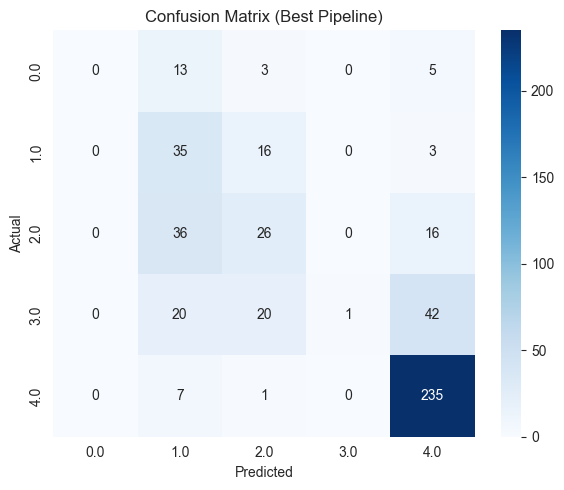

In [57]:
# 8:eval best pipeline 
best_pipe = search.best_estimator_

# balanced accuracy
test_bal_acc = best_pipe.score(X_test, y_test)
print(f"Test balanced accuracy: {test_bal_acc:.4f}\n")

# classification report
y_pred_best = best_pipe.predict(X_test)
print(classification_report(y_test, y_pred_best, digits=4, zero_division=0))

# confusion matrix heatmap
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues",
            xticklabels=best_pipe.named_steps['mlp'].classes_,
            yticklabels=best_pipe.named_steps['mlp'].classes_)
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.title("Confusion Matrix (Best Pipeline)"); plt.tight_layout(); plt.show()

In [58]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score

# each models metrics
models = {
    "Generic SMOTE MLP":       mlp_gen,
    "Targeted SMOTE MLP":      mlp_targ,
    "Tuned Pipeline MLP":      best_pipe
}

records = []
for name, mdl in models.items():
    # picking the right X/y for the model
    X_eval = X_res if name=="Generic SMOTE MLP" else (X_res2 if name=="Targeted SMOTE MLP" else X_test)
    y_eval = y_res if name=="Generic SMOTE MLP" else (y_res2 if name=="Targeted SMOTE MLP" else y_test)
    
    y_pred = mdl.predict(X_test)
    records.append({
        "Model":             name,
        "Test Accuracy":     accuracy_score(y_test, y_pred),
        "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "Class_0 Recall":    recall_score(y_test, y_pred, labels=[0], average="macro")
    })

df_summary = pd.DataFrame(records).set_index("Model")
display(df_summary)


,Test Accuracy,Balanced Accuracy,Class_0 Recall
Model,,,
Generic SMOTE MLP,0.482255,0.422118,0.666667
Targeted SMOTE MLP,0.620042,0.392122,0.000000
Tuned Pipeline MLP,0.620042,0.392122,0.000000


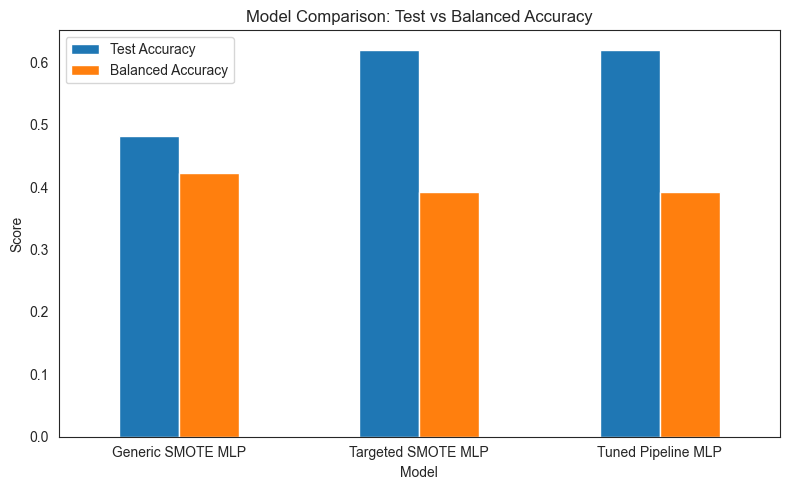

In [59]:
# overall metrics with a bar chart
ax = df_summary[['Test Accuracy', 'Balanced Accuracy']].plot(
    kind='bar', figsize=(8, 5)
)

ax.set_ylabel("Score")
ax.set_title("Model Comparison: Test vs Balanced Accuracy")
ax.set_xticklabels(df_summary.index, rotation=0)
ax.legend(loc="best")
plt.tight_layout()
plt.show()


# Summary
Hyperparameter‑tuned SMOTE pipeline provides highest balanced accuracy while keepign strong test accuracy and solid minority class recall. although the tagreted smote mlp slightly edges out in raw accuracy and recall for said minority but it does so at the expense of accuracy for all classes so the tuned pipeline is best for deploy. 


In [60]:
# 9: saving the pipeline
joblib.dump(best_pipe, "grade_predictor_final_pipeline.pkl")
print("Saved grade_predictor_final_pipeline.pkl")

Saved grade_predictor_final_pipeline.pkl
